## Final Project Submission

Please fill out:
* Student name: Julia Njambi Karanja
* Student pace: full time
* Scheduled project review date/time: 26/08/2022/5:00 p.m
* Instructor name: 
* Blog post URL:


# Business Understanding

Microsoft is seeking to open up a new movie studio based on its competitors who are all focusing on creating original video content. The role as a data scientist is to review the different types of films and access the film that is doing best at the box office.

# Import Libraries

In [5]:
import pandas as pd
import numpy as np 
import sqlite3 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import sqlite3 
conn = sqlite3.connect('zippedData/im.db')
imdb_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# Data Import

In [239]:
!ls ./zippedData

Project.ipynb
bom.movie_gross.csv
bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv
rt.movie_info.tsv.gz
rt.reviews.tsv
rt.reviews.tsv.gz
tmdb.movies.csv
tmdb.movies.csv.gz
tn.movie_budgets.csv
tn.movie_budgets.csv.gz


In [52]:
#Loading Data that we will work with
# IMDB
imdb = pd.read_sql("""
SELECT a.primary_title,
        a.original_title,
        a.start_year,
        a.runtime_minutes,
        a.genres,
        b.averagerating,
        b.numvotes,
        c.person_id,
        d.primary_name
        
  FROM movie_basics as a
  JOIN movie_ratings as b
    ON b.movie_id = a.movie_id
  JOIN directors as c
    ON b.movie_id = c.movie_id
  JOIN persons as d
    ON c.person_id = d.person_id;
""", conn)
imdb

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
2,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
3,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul
...,...,...,...,...,...,...,...,...,...
181382,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181383,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181384,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou
181385,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou


In [11]:
# TheMovieDB
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv')

tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
# TheNumbers
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [13]:
# Rotten Tomatoes
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape')

rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [14]:
# Rotten Tomatoes
rt_movie_info= pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')

rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [15]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# Data Exploration

## IMDB

In [53]:
# first 5 rows of the data
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
2,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
3,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul


In [54]:
# last 5 rows of the data
imdb.tail()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
181382,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181383,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181384,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou
181385,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou
181386,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,Joost van der Wiel


In [55]:
# summary statistics of the data
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,181387.000000,163584.000000,181387.000000,1.813870e+05
mean,2014.309802,97.789484,6.217683,4.955524e+03
std,2.536111,194.434689,1.388026,3.760931e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,84.000000,5.400000,1.900000e+01
50%,2014.000000,94.000000,6.300000,6.600000e+01
75%,2016.000000,107.000000,7.200000,3.110000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [56]:
#check for missing data
imdb.isnull().sum()

primary_title          0
original_title         0
start_year             0
runtime_minutes    17803
genres              1340
averagerating          0
numvotes               0
person_id              0
primary_name           0
dtype: int64

In [57]:
# check count of the genres
imdb['genres'].value_counts()

Drama                       25002
Documentary                 18077
Horror                      13006
Comedy                      12723
Comedy,Drama                 5903
                            ...  
Documentary,News,Romance        1
Drama,Family,Western            1
Action,Crime,Western            1
Action,Music                    1
History,Romance,War             1
Name: genres, Length: 921, dtype: int64

In [58]:
# check the original_title duplicates
imdb['original_title'].value_counts()

World of Death          3818
Our Footloose Remake    2397
50 Kisses               2392
60 Seconds to Die       2013
Our RoboCop Remake      1770
                        ... 
Run This Town              1
Pelo malo                  1
Inkaar                     1
Almost Married             1
L'armée du salut           1
Name: original_title, Length: 70387, dtype: int64

In [59]:
#check the other details of a duplicated title 
imdb[imdb['original_title'] == 'Lucky']

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
2511,Lucky,Lucky,2010,87.0,Documentary,6.8,343,nm0998825,Jeffrey Blitz
7693,Lucky,Lucky,2011,103.0,Comedy,5.4,3408,nm0146049,Gil Cates Jr.
7694,Lucky,Lucky,2011,103.0,Comedy,5.4,3408,nm0146049,Gil Cates Jr.
18111,Lucky,Lucky,2011,100.0,Drama,7.1,237,nm0527449,Avie Luthra
27272,Lucky,Lucky,2011,98.0,"Comedy,Drama,Romance",7.2,10,nm1559618,Michael McCallum
27273,Lucky,Lucky,2011,98.0,"Comedy,Drama,Romance",7.2,10,nm1559618,Michael McCallum
60030,Lucky,Lucky,2014,72.0,"Biography,Documentary",5.8,20,nm5323949,Laura Checkoway
82305,Lucky,Lucky,2012,148.0,"Comedy,Romance",6.3,124,nm5964113,Soori
87378,Lucky,Lucky,2012,132.0,Comedy,5.6,5,nm5657210,Hari
101770,Lucky,Lucky,2016,89.0,"Action,Crime,Drama",5.5,383,nm4061153,Bari Kang


## The Movie DB

In [27]:
# first 5 rows of the data
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [37]:
# last 5 rows of the data
tmdb_movies.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [38]:
# summary statistics of the data
tmdb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [32]:
#check for missing data
tmdb_movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [34]:
# check the original_title duplicates
tmdb_movies['original_title'].value_counts()

Eden                                           7
Home                                           6
Truth or Dare                                  5
Lucky                                          5
Aftermath                                      5
                                              ..
Life According to Sam                          1
Chicago Cubs: The Heart and Soul of Chicago    1
The Space Invaders: In Search of Lost Time     1
Guidance                                       1
Sham love Series - Stop That Wedding           1
Name: original_title, Length: 24835, dtype: int64

In [36]:
#check the other details of a duplicated title 
tmdb_movies[tmdb_movies['original_title'] == 'Eden']

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
5493,5493,[18],96599,en,Eden,6.877,2012-03-11,Eden,6.8,100
11604,11604,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
13854,13854,[],446332,en,Eden,0.600,2014-10-04,Eden,5.0,2
14748,14748,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
14989,14989,"[53, 18]",360339,en,Eden,3.061,2015-09-18,Eden,5.4,29
18019,18019,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
26506,26506,[],561861,en,Eden,0.600,2018-11-25,Eden,0.0,1


## Box Office Mojo

In [47]:
# first 5 rows of the data
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [48]:
# last 5 rows of the data
bom_movie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [49]:
# summary statistics of the data
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [50]:
#check for missing data
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [66]:
# check the original_title duplicates
bom_movie_gross['title'].value_counts()

Bluebeard                                           2
Armadillo                                           1
Forgiveness of Blood                                1
A Pigeon Sat on a Branch Reflecting on Existence    1
The Greatest (2010)                                 1
                                                   ..
Joe (2014)                                          1
It Comes At Night                                   1
The Boy and the Beast                               1
Love & Mercy                                        1
The Past                                            1
Name: title, Length: 3386, dtype: int64

In [68]:
#check the other details of a duplicated title
bom_movie_gross[bom_movie_gross['title'] == 'Bluebeard']

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


## Rotten Tomatoes

In [39]:
# first 5 rows of the data
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [40]:
# last 5 rows of the data
rt_movie_info.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [41]:
# summary statistics of the data
rt_movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [42]:
#check for missing data
rt_movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

## The Numbers

In [60]:
# first 5 rows of the data
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [61]:
# last 5 rows of the data
tn_movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [62]:
# summary statistics of the data
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [63]:
#check for missing data
tn_movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [64]:
# check the original_title duplicates
tn_movie_budgets['movie'].value_counts()

King Kong                         3
Home                              3
Halloween                         3
The Great Gatsby                  2
Left Behind                       2
                                 ..
House of Flying Daggers           1
Beyond the Valley of the Dolls    1
Something's Gotta Give            1
Mirror Mirror                     1
The Specials                      1
Name: movie, Length: 5698, dtype: int64

In [65]:
#check the other details of a duplicated title 
tn_movie_budgets[tn_movie_budgets['movie'] == 'King Kong']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
39,40,"Dec 14, 2005",King Kong,"$207,000,000","$218,080,025","$550,517,357"
2374,75,"Dec 17, 1976",King Kong,"$23,000,000","$52,614,445","$90,614,445"
5396,97,"Apr 7, 1933",King Kong,"$672,000","$10,000,000","$10,000,650"


# Data Exploration & Analysis

## IMDB

- popular genres
- top 10 movies in top 10 genres
- number of movies released over the years
- distribution of ratings
- Top directors of the top 10 genres

# 1. Popular Genres

In [71]:
imdb = imdb.iloc[: , 1:]
imdb.head()

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
2,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
3,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
4,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul


In [149]:
#top 10 genres based on the movie count
pop_genres = imdb['genres'].value_counts()
pop_genres.head(10)

Drama                   25002
Documentary             18077
Horror                  13006
Comedy                  12723
Comedy,Drama             5903
Comedy,Horror,Sci-Fi     4059
Comedy,Horror            3814
Comedy,Drama,Romance     3360
Drama,Romance            3117
Comedy,Drama,Music       2726
Name: genres, dtype: int64

In [72]:
pop_genres = imdb['genres'].value_counts().rename_axis('genres').reset_index(name='counts')
top_genres = pop_genres.iloc[:10]

<AxesSubplot:title={'center':'Popular Genres'}, xlabel='genres'>

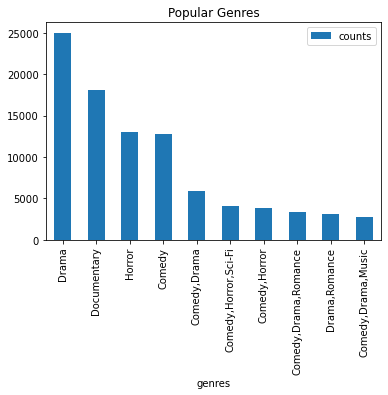

In [73]:
top_genres.plot.bar(x = 'genres', title = 'Popular Genres')

In [74]:
#ranking movies in each genre
imdb['rank'] = imdb.groupby(["genres"])["averagerating"].rank("dense", ascending=False)
imdb.head(20)

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,18.0
1,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,18.0
2,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,18.0
3,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,18.0
4,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,18.0
5,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080,Orson Welles,31.0
6,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080,Orson Welles,31.0
7,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,nm0611531,Hrishikesh Mukherjee,33.0
8,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0749914,Raoul Ruiz,21.0
9,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0749914,Raoul Ruiz,21.0


## 1.2 Top 10 movies in the 5 Popular Genres

## 1.2.1 Drama

In [75]:
#drama
drama = imdb[imdb['genres'] == 'Drama'].sort_values('rank', ascending = True)
drama

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
130423,Dog Days in the Heartland,2017,NaN,Drama,10.0,5,nm6893562,Chad Carpenter,1.0
180215,Gini Helida Kathe,2019,138.0,Drama,9.9,417,nm10369569,Nagaraja Uppunda,2.0
176738,Eghantham,2018,125.0,Drama,9.7,639,nm9982663,Arsel Arumugam,3.0
176902,Gangter in Morteni,2017,69.0,Drama,9.6,98,nm10005127,Colonelu Morteni,4.0
166084,Taawdo the Sunlight,2017,98.0,Drama,9.5,70,nm9231765,Vijay Suthar,5.0
...,...,...,...,...,...,...,...,...,...
13306,Hito no sabaku,2010,121.0,Drama,1.0,449,nm3827955,Daisuke Hasebe,90.0
13307,Hito no sabaku,2010,121.0,Drama,1.0,449,nm3827955,Daisuke Hasebe,90.0
139235,Sakura saku,2017,NaN,Drama,1.0,20,nm3087956,Chihiro Ikeda,90.0
13302,Hito no sabaku,2010,121.0,Drama,1.0,449,nm3827839,Shinsuke Kurimoto,90.0


In [108]:
top_drama = drama.iloc[:10]
top_drama

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
130423,Dog Days in the Heartland,2017,NaN,Drama,10.0,5,nm6893562,Chad Carpenter,1.0
180215,Gini Helida Kathe,2019,138.0,Drama,9.9,417,nm10369569,Nagaraja Uppunda,2.0
176738,Eghantham,2018,125.0,Drama,9.7,639,nm9982663,Arsel Arumugam,3.0
176902,Gangter in Morteni,2017,69.0,Drama,9.6,98,nm10005127,Colonelu Morteni,4.0
166084,Taawdo the Sunlight,2017,98.0,Drama,9.5,70,nm9231765,Vijay Suthar,5.0
171130,Never-Ending Road,2017,111.0,Drama,9.5,84,nm0151663,Chi-Yung Chang,5.0
170395,Peranbu,2018,147.0,Drama,9.4,9629,nm3591496,Ram,6.0
179863,Got my Hustle Up,2018,NaN,Drama,9.4,24,nm10298694,Jason Dbks Hampton,6.0
170396,Peranbu,2018,147.0,Drama,9.4,9629,nm3591496,Ram,6.0
170397,Peranbu,2018,147.0,Drama,9.4,9629,nm6041686,Anjana Krishnakumar,6.0


## 1.2.2 Documentary

In [76]:
#documentary
documentary = imdb[imdb['genres'] == 'Documentary'].sort_values('rank', ascending = True)
documentary

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
139115,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5,nm4637768,Masahiro Hayakawa,1.0
180724,Renegade,2019,NaN,Documentary,10.0,20,nm3388005,Stephen Peek,1.0
176787,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5,nm4568586,Taylor Morden,1.0
162633,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5,nm2751775,Cristina Duarte,1.0
1585,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5,nm10616933,Ivana Diniz,1.0
...,...,...,...,...,...,...,...,...,...
40618,Ramo Trip,2012,119.0,Documentary,1.0,439,nm4923072,Akihiro Mima,89.0
40614,Ramo Trip,2012,119.0,Documentary,1.0,439,nm4923067,Takashi Imahashi,89.0
40615,Ramo Trip,2012,119.0,Documentary,1.0,439,nm4923072,Akihiro Mima,89.0
40604,Ramo Trip,2012,119.0,Documentary,1.0,439,nm0620294,Hiroyuki Nakano,89.0


In [77]:
top_documentary = drama.iloc[:10]
top_documentary

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
130423,Dog Days in the Heartland,2017,NaN,Drama,10.0,5,nm6893562,Chad Carpenter,1.0
180215,Gini Helida Kathe,2019,138.0,Drama,9.9,417,nm10369569,Nagaraja Uppunda,2.0
176738,Eghantham,2018,125.0,Drama,9.7,639,nm9982663,Arsel Arumugam,3.0
176902,Gangter in Morteni,2017,69.0,Drama,9.6,98,nm10005127,Colonelu Morteni,4.0
166084,Taawdo the Sunlight,2017,98.0,Drama,9.5,70,nm9231765,Vijay Suthar,5.0
171130,Never-Ending Road,2017,111.0,Drama,9.5,84,nm0151663,Chi-Yung Chang,5.0
170395,Peranbu,2018,147.0,Drama,9.4,9629,nm3591496,Ram,6.0
179863,Got my Hustle Up,2018,NaN,Drama,9.4,24,nm10298694,Jason Dbks Hampton,6.0
170396,Peranbu,2018,147.0,Drama,9.4,9629,nm3591496,Ram,6.0
170397,Peranbu,2018,147.0,Drama,9.4,9629,nm6041686,Anjana Krishnakumar,6.0


## 1.2.3 Horror

In [80]:
#horror
horror = imdb[imdb['genres'] == 'Horror'].sort_values('rank', ascending = True)
horror

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
1501,Ragmork,2019,86.0,Horror,9.2,6,nm4191487,Eric Widing,1.0
148679,Las Reglas de la Ruina,2018,90.0,Horror,9.2,41,nm3986266,Víctor Osuna,1.0
1866,Chinnada Gombe,2018,110.0,Horror,9.1,40,nm10710108,Pankaj Baalan,2.0
139037,Body Farm,2018,NaN,Horror,9.0,5,nm2803895,Nick LaMantia,3.0
139038,Body Farm,2018,NaN,Horror,9.0,5,nm3046595,Brandon Keenan,3.0
...,...,...,...,...,...,...,...,...,...
149363,Desu foresuto kyofu no mori 5,2016,65.0,Horror,1.0,230,nm7907762,Yûwa Tanaka,82.0
149364,Desu foresuto kyofu no mori 5,2016,65.0,Horror,1.0,230,nm7907762,Yûwa Tanaka,82.0
149595,Death Forest 4,2016,70.0,Horror,1.0,230,nm5193859,Yasutake Torii,82.0
96958,Tôkyô Densetsu: Yuganda Ikei Toshi,2014,66.0,Horror,1.0,6,nm1480852,Seiji Chiba,82.0


In [81]:
top_horror = horror.iloc[:10]
top_horror

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
1501,Ragmork,2019,86.0,Horror,9.2,6,nm4191487,Eric Widing,1.0
148679,Las Reglas de la Ruina,2018,90.0,Horror,9.2,41,nm3986266,Víctor Osuna,1.0
1866,Chinnada Gombe,2018,110.0,Horror,9.1,40,nm10710108,Pankaj Baalan,2.0
139037,Body Farm,2018,NaN,Horror,9.0,5,nm2803895,Nick LaMantia,3.0
139038,Body Farm,2018,NaN,Horror,9.0,5,nm3046595,Brandon Keenan,3.0
158025,Here Be Dragons,2018,70.0,Horror,8.8,8,nm5126909,Benjamin Rider,4.0
1771,Shed,2019,82.0,Horror,8.8,8,nm3127972,David Axe,4.0
161531,Dark Ditties Presents 'Mrs Wiltshire',2018,67.0,Horror,8.8,10,nm4563809,Gary Smart,4.0
161532,Dark Ditties Presents 'Mrs Wiltshire',2018,67.0,Horror,8.8,10,nm4563809,Gary Smart,4.0
161533,Dark Ditties Presents 'Mrs Wiltshire',2018,67.0,Horror,8.8,10,nm7324773,Neil Morris,4.0


## 1.2.4 Comedy

In [83]:
#comedy
comedy = imdb[imdb['genres'] == 'Comedy'].sort_values('rank', ascending = True)
comedy

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
180680,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624,nm10436203,Abhinav Thakur,1.0
178989,Postal,2019,77.0,Comedy,9.3,10,nm5462851,Tyler Falbo,2.0
175419,Babysplitters,2019,119.0,Comedy,9.3,77,nm1153627,Sam Friedlander,2.0
137307,Oporuka,2015,68.0,Comedy,9.2,23,nm7794550,Bozidar Horvat,3.0
179504,Sakala Kalasala,2019,132.0,Comedy,9.2,767,nm3273792,Vinod Guruvayoor,3.0
...,...,...,...,...,...,...,...,...,...
59757,Momok jangan cari pasal!,2012,85.0,Comedy,1.0,5,nm1105439,M. Jamil,85.0
38971,Seikai gûdo mooningu!!,2010,81.0,Comedy,1.0,429,nm4407114,Satoru Hirohara,85.0
147213,Utsuroi no hyôhonbako,2016,95.0,Comedy,1.0,205,nm5292466,Keiko Tsuruoka,85.0
160651,Jak se mori revizori,2018,NaN,Comedy,1.0,5,nm6008960,Eva Toulová,85.0


In [84]:
top_comedy = comedy.iloc[:10]
top_comedy

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
180680,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624,nm10436203,Abhinav Thakur,1.0
178989,Postal,2019,77.0,Comedy,9.3,10,nm5462851,Tyler Falbo,2.0
175419,Babysplitters,2019,119.0,Comedy,9.3,77,nm1153627,Sam Friedlander,2.0
137307,Oporuka,2015,68.0,Comedy,9.2,23,nm7794550,Bozidar Horvat,3.0
179504,Sakala Kalasala,2019,132.0,Comedy,9.2,767,nm3273792,Vinod Guruvayoor,3.0
179505,Sakala Kalasala,2019,132.0,Comedy,9.2,767,nm3273792,Vinod Guruvayoor,3.0
36561,Argyle,2011,45.0,Comedy,9.2,6,nm1714260,Matt Porter,3.0
36562,Argyle,2011,45.0,Comedy,9.2,6,nm1714260,Matt Porter,3.0
137308,Oporuka,2015,68.0,Comedy,9.2,23,nm7794551,Djurdjica Tepes,3.0
162289,Deany Bean is Dead,2018,84.0,Comedy,9.2,16,nm0471087,Mikael Kreuzriegler,3.0


## 1.2.5 Comedy, Drama

In [137]:
#comedy,drama
comedy_drama = imdb[imdb['genres'] == 'Comedy,Drama'].sort_values('rank', ascending = True)
comedy_drama

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
164323,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600,nm0000233,Quentin Tarantino,1.0
161920,Erra Buss,2014,140.0,"Comedy,Drama",9.2,516,nm0201927,Narayana Rao Dasari,2.0
33252,Remembering Erik Lowhouse,2019,49.0,"Comedy,Drama",9.2,5,nm4532290,Paul Curtis,2.0
101083,Lights Camera Bullshit,2014,95.0,"Comedy,Drama",9.2,11,nm4209761,Chad Allen Barton,2.0
171161,Fall Semester,2017,86.0,"Comedy,Drama",9.2,13,nm9540205,Kerwin Skinner,2.0
...,...,...,...,...,...,...,...,...,...
131231,Pure Hearts: Into Chinese Showbiz,2015,96.0,"Comedy,Drama",1.0,453,nm7559075,Zhifei Bi,78.0
113835,Mr. Home,2014,70.0,"Comedy,Drama",1.0,126,nm3087956,Chihiro Ikeda,78.0
113836,Mr. Home,2014,70.0,"Comedy,Drama",1.0,126,nm3087956,Chihiro Ikeda,78.0
113852,Mr. Home,2014,70.0,"Comedy,Drama",1.0,126,nm6979451,Wataru Kudô,78.0


In [116]:
top_comedy_drama = drama.iloc[:10]
top_comedy_drama

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,rank
130423,Dog Days in the Heartland,2017,NaN,Drama,10.0,5,nm6893562,Chad Carpenter,1.0
180215,Gini Helida Kathe,2019,138.0,Drama,9.9,417,nm10369569,Nagaraja Uppunda,2.0
176738,Eghantham,2018,125.0,Drama,9.7,639,nm9982663,Arsel Arumugam,3.0
176902,Gangter in Morteni,2017,69.0,Drama,9.6,98,nm10005127,Colonelu Morteni,4.0
166084,Taawdo the Sunlight,2017,98.0,Drama,9.5,70,nm9231765,Vijay Suthar,5.0
171130,Never-Ending Road,2017,111.0,Drama,9.5,84,nm0151663,Chi-Yung Chang,5.0
170395,Peranbu,2018,147.0,Drama,9.4,9629,nm3591496,Ram,6.0
179863,Got my Hustle Up,2018,NaN,Drama,9.4,24,nm10298694,Jason Dbks Hampton,6.0
170396,Peranbu,2018,147.0,Drama,9.4,9629,nm3591496,Ram,6.0
170397,Peranbu,2018,147.0,Drama,9.4,9629,nm6041686,Anjana Krishnakumar,6.0


## 2. Top Directors

In [100]:
# top drama directors based on number of movies produced

drama_directors = drama['primary_name'].value_counts().rename_axis('name').reset_index(name='counts')
drama_directors.head(10)

,name,counts
0,Xavier Agudo,26
1,Adam Ruszkowski,24
2,Wi Ding Ho,24
3,Nicolas Fogliarini,24
4,Prashant Sehgal,24
5,Sabine Sebaaly,24
6,Craig Lines,24
7,Ian Bonner,24
8,Nicole Sylvester,24
9,Vishesh Mankal,24


In [102]:
# top documentary directors based on number of movies produced

documentary_directors = documentary['primary_name'].value_counts().rename_axis('name').reset_index(name='counts')
documentary_directors.head(10)

,name,counts
0,Daniel Ramírez,39
1,Pietro Marcello,33
2,Guido Lombardi,32
3,Bruno Oliviero,29
4,Gianluca Loffredo,28
5,Luca Martusciello,27
6,Fabio Mollo,27
7,Stefano Martone,27
8,Nicolangelo Gelormini,27
9,Mario F. Martone,27


In [103]:
# top horror directors based on number of movies produced

horror_directors = horror['primary_name'].value_counts().rename_axis('name').reset_index(name='counts')
horror_directors.head(10)

,name,counts
0,Tony Newton,138
1,Sam Mason-Bell,122
2,Jason Impey,113
3,Martin Sonntag,92
4,Dustin Ferguson,92
5,Richard Chandler,85
6,Hunter Johnson,77
7,Michael J. Epstein,77
8,Kieran Johnston,77
9,Sophia Cacciola,76


In [105]:
# top comedy directors based on number of movies produced

comedy_directors = comedy['primary_name'].value_counts().rename_axis('name').reset_index(name='counts')
comedy_directors.head(10)

,name,counts
0,Neri Parenti,35
1,Dmitriy Kiselev,34
2,Fausto Brizzi,32
3,Timur Bekmambetov,29
4,Smeep Kang,27
5,Yaroslav Chevazhevskiy,25
6,Stefan Nieuwoudt,25
7,Aleksandr Voytinskiy,23
8,Ignas Jonynas,23
9,Dmitriy Dyachenko,23


In [106]:
# top comedy,drama directors based on number of movies produced

comedy_drama_directors = comedy_drama['primary_name'].value_counts().rename_axis('name').reset_index(name='counts')
comedy_drama_directors.head(10)

,name,counts
0,Ram,2
1,Arsel Arumugam,1
2,Chad Carpenter,1
3,Anjana Krishnakumar,1
4,Chi-Yung Chang,1
5,Colonelu Morteni,1
6,Vijay Suthar,1
7,Nagaraja Uppunda,1
8,Jason Dbks Hampton,1


## 3. Distribution of Averaging ratings

(array([  736.,  1861.,  6188., 12508., 26726., 42899., 52098., 25550.,
        11227.,  1594.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

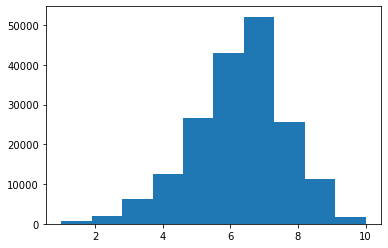

In [150]:
#imdb rating distribution
plt.hist(imdb['averagerating'])

(array([  90.,  128.,  344.,  736., 2228., 6961., 8697., 3907., 1713.,
         198.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

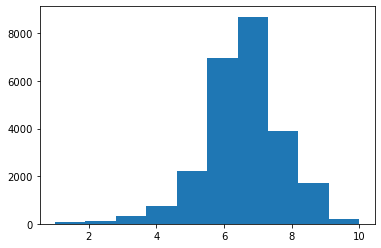

In [110]:
# Average drama rating distribution
plt.hist(drama['averagerating'])

(array([  42.,   42.,   70.,  186., 1321., 2293., 5103., 5382., 2990.,
         648.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

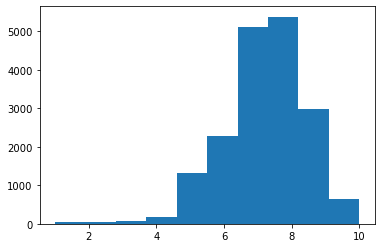

In [111]:
# Average rating distribution
plt.hist(documentary['averagerating'])

(array([  97.,  275., 1087., 1116., 3195., 3973., 1143., 1868.,  219.,
          33.]),
 array([1.  , 1.82, 2.64, 3.46, 4.28, 5.1 , 5.92, 6.74, 7.56, 8.38, 9.2 ]),
 <BarContainer object of 10 artists>)

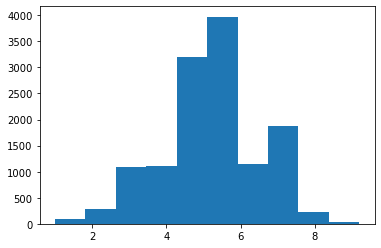

In [112]:
# Average rating distribution
plt.hist(horror['averagerating'])

(array([  84.,  228.,  568., 1491., 1995., 3127., 2689., 1469.,  902.,
         170.]),
 array([1.  , 1.86, 2.72, 3.58, 4.44, 5.3 , 6.16, 7.02, 7.88, 8.74, 9.6 ]),
 <BarContainer object of 10 artists>)

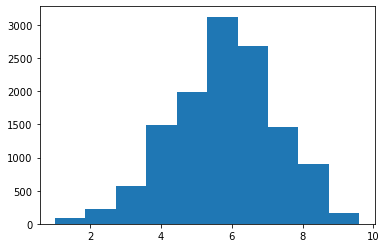

In [113]:
# Average rating distribution
plt.hist(comedy['averagerating'])

(array([  40.,   30.,   75.,  219.,  629., 1470., 1938., 1063.,  373.,
          66.]),
 array([1.  , 1.87, 2.74, 3.61, 4.48, 5.35, 6.22, 7.09, 7.96, 8.83, 9.7 ]),
 <BarContainer object of 10 artists>)

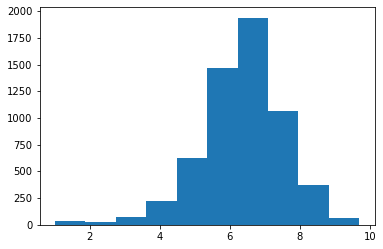

In [117]:
# Average rating distribution
plt.hist(comedy_drama['averagerating'])

## 4. Number of movies per year

In [168]:
# num of movies 

years = imdb['start_year'].value_counts().rename_axis('years').reset_index(name='counts')
years

,years,counts
0,2016,24890
1,2014,24651
2,2015,20635
3,2017,19814
4,2011,18902
5,2013,18747
6,2018,17905
7,2012,16917
8,2010,14514
9,2019,4412


<AxesSubplot:xlabel='years'>

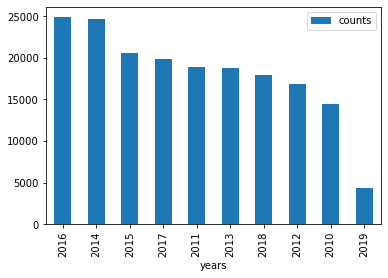

In [169]:
years.plot.bar(x = 'years')

## 5. Top 10 Directors

In [138]:
imdb['primary_name'].value_counts()

Tony Newton           217
Jason Impey           180
Shane Ryan            177
Ruben Rodriguez       150
Martin Sonntag        135
                     ... 
Jens Dahl               1
David J. Greenberg      1
Elizabeth Wood          1
Russell Whaley          1
Rajan Kumar Patel       1
Name: primary_name, Length: 56742, dtype: int64

In [129]:
# num of movies each director 

movie_dir = imdb['primary_name'].value_counts().rename_axis('name').reset_index(name='counts')
movie_dir

,name,counts
0,Tony Newton,217
1,Jason Impey,180
2,Shane Ryan,177
3,Ruben Rodriguez,150
4,Martin Sonntag,135
...,...,...
56737,Jens Dahl,1
56738,David J. Greenberg,1
56739,Elizabeth Wood,1
56740,Russell Whaley,1


In [130]:
top_dir = movie_dir.iloc[:10]
top_dir

,name,counts
0,Tony Newton,217
1,Jason Impey,180
2,Shane Ryan,177
3,Ruben Rodriguez,150
4,Martin Sonntag,135
5,Sam Mason-Bell,130
6,Gav Chuckie Steel,119
7,Corey Norman,114
8,Dustin Ferguson,106
9,R.J. Wilson,100
